In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [98]:
df_original = pd.read_csv('../clean_dataset.csv', sep=',', header=0)
df = pd.DataFrame(data=df_original)
sns.set(style="ticks", color_codes=True)

In [93]:
features = df[[c for c in df if c != "shares"]]
target = df["shares"]
X_train, X_test, y_train, y_test = train_test_split(features, target)

#X = list(zip(df['kw_avg_avg'], df['LDA_03'], df['kw_max_avg'], df['self_reference_avg_sharess'], df['self_reference_min_shares'], df['self_reference_max_shares']))
#Y = np.array(df['shares'])

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=12)

In [96]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
model = knn.fit(X_train, Y_train)
predicted = model.predict(X_test)

print(predicted)
print(Y_test)

[6940.  1560.  2740.  ... 1852.4 5700.   796.6]
18881     1800
29032     1500
23400     1300
15721     1600
26859      617
11991     1400
17402     1800
15152     1500
19639     1100
28746    11100
2220      2100
18133     1100
37366     1400
37380      581
20243     1500
10811     1600
18267      766
30024     1800
25033    24500
1003       527
23781     1800
20184     9700
19483     4000
14344      795
25712     2000
25470     2500
17875      899
35900       91
27768     1800
19665      461
         ...  
15167     1800
13748      902
33249     1300
13175     1500
127       6000
2852       416
32595     2900
32881     3200
1855       886
28836     1600
4609       934
21462      952
6777       891
8384      1700
5627      2300
28940     4400
886       1000
14182     4300
11262      820
18984      809
11930     5000
31835     2500
27005      583
18889     1700
30702    11800
18663     1100
8388      1300
30704      764
17289     1100
7411       729
Name: shares, Length: 11715, dtype: i

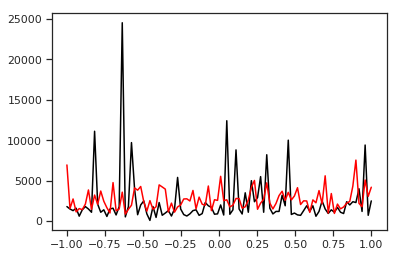

In [97]:
plt.plot(np.linspace(-1, 1, 100), Y_test[:100], label='data', color='black')
plt.plot(np.linspace(-1, 1, 100), predicted[:100], label='predicted', color='red')